In [218]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y



<font color=blue> _Objetivo del curso: Aprender las diferentes fases del Aprendizaje de Datos (ML) a traves de ejemplos reales. Esto con el fin de obtener una idea clara de lo que significa la ciencia de datos._
</font>

La mejor manera de entender los procesos involucrados en la ciencia de datos, es a traves de ejemplos realistas (concretos).


Estaremos trabajando sobre un jupyter notebook: Usaremos Python en cada nivel de la tuberia 

La librerias principales de Python involucradas en este curso son 

* <b>Pandas</b> para la manipulacion e ingesta de los datos
* <b>Matplotlib</b> and <b> seaborn</b> para la vizualización de los datos
* <b>Numpy</b> para computo de arreglos multidimensionales
* <b>sklearn</b> para el aprendizaje de maquinas y el modelado predectivo

### Proceso de Instalación 

Una manera sencilla de installar esta paqueteria es descargar e instalar 
la distribucion <a href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> que encapsula a todas las librerias mencionadas. Esta distribución esta disponible en todas las plataformas (Windows, Linux and Mac OSX).

### Nota 

...

### El conjunto de datos (Wisconsin) del Cáncer de mama

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. El espacio tridimensional es el descrito en: [K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de la programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34].

Del artículo mencionado leemos:

"Cada registro representa información de seguimiento para un caso cáncer de mama. 
Estos  pacientes han sido atentidos por el Dr. Wolberg desde el año 1984,
están incluídos sólo aquellos casos que exhiben cáncer de mama y donde no hay evidencia de metástasis 
a distancia en el tiempo de diagnóstico."


![](images/fna-cell.png)

<h5 align="center">Imagen ampliada de un seno maligno obtenida con la biopsia FNA (Fine Needle Aspiration). Los núcleos de células visibles se han esbozado con la ayuda de un programa de ajuste de curvas. El sistema también calcula varias características para cada núcleo y diagnostica con precisión la muestra. El proceso de diagnóstico interactivo toma alrededor de 5 minutos por muestra.</h5> 

FUENTE: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34

Los datos se encuentran en el repositorio de aprendizaje automático de UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
***

<h2 align="center">El flujo de trabajo en un proyecto de ciencia de datos </h2>

El conjunto de  lineamientos espeficos ('ducto') en un proyecto de  ciencia de datos varia dependiendo de la naturaleza del mismo. Aqui presentamos un ducto estandar:


### Analisis exploratorio de los datos

 - Extracción: Cargar el conjunto de datos y echarles una mirada
 - Limpieza: Encontrar los valores que faltan
 - Visualización: Crear algunas gráficas interesantes que nos permitan idendificar correlaciones y 
 - Suposiciones: Formular hipótesis sobre los gráficos
 
### Ingeniería de características

 - Cargar
 - Extraer
 - Procesar
 
### Modelado de datos
 - Seleccion de Caracteristicas.  Reducir el numero de caracterisiticas trae los siguientes beneficios:
     - Reduce el numero de redundancias en los datos
     - Acelera los procesos de entrenamiento 
     - Reduce el 'overfitting'
     - Muestreo de modelos base
 - Muestreo de los modelos base   
 ***

_Ajustamos un poco el estilo de este libro trabajo para tener graficas centradas_ 

In [219]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


## Análisis exploratorio de los datos

  **Extracción** 
  
  Obtenemos los datos directamente del URL oficial del repositorio de datos. Para ello importamos la librería _wget_

In [220]:
_import wget

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'  
local_path = './data/wisconsin.csv'

#descargamos la informacion de url y la guardamos en local_path
wget.download(url, local_path) 

SyntaxError: invalid syntax (<ipython-input-220-881c5dc7925d>, line 1)

En el sitio del repositorio podemos encontrar un
<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo </a> con las caracterisiticas de la  información

Más espeficamente el punto siete nos describe los atributos de los datos. Los primeros dos atributos (o caracteristicas) son:

    1) ID 
    2) Diagnosis (M = Maligno, B = Benigno)

Se calculan diez características de valor real para cada núcleo celular:

    a) radio (media de las distancias desde el centro a los puntos en el perímetro)
    b) textura (desviación estándar de los valores de escala de grises)
    c) perímetro
    d) área
    e) suavidad (variación local en longitudes de radio)
    f) compacidad (perímetro ^ 2 / área - 1.0)
    g) concavidad (severidad de las porciones cóncavas del contorno)
    h) puntos cóncavos (número de porciones cóncavas del contorno)
    i) simetria
    j) dimensión fractal ("aproximación de la línea de costa" - 1)


    La media, el error estándar y el "peor" o mayor (media de las tres
    los valores más grandes) de estas características se calcularon para cada imagen,
    dando como resultado 30 características. Por ejemplo, el campo 3 es Radio medio, campo
    13 es el radio SE, el campo 23 es el peor radio.
    
    Todos los valores de las funciones se registran con cuatro dígitos significativos.

#### Caracteristicas de los datos 
***
Los datos del archivo que descargamos, no poseen las correspondientes etiquetas (_a) radio, b) textura,..._).Tenemos 30  mediciones, el ID y el diagnostico. Entonces tenemos un número total de 32 atributos.  Las siguientes instrucciónes nos crea un arreglo de caracteristicas.  

In [221]:
features =  ['a:radio','b:textura','c:perimetro', \
             'd:area', 'e:suavidad','f:compactes', \
             'g:concavidad', 'h:puntos concavos','i:simetria',\
             'j:dimension fractal']

columns_all = ['ID', 'Diagnostico'] + \
              list(map(lambda x: x[2:]+'_promedio', features)) + \
              list(map(lambda x: x[2:]+'_error', features)) +  \
              list(map(lambda x: x[2:]+'_peor', features))

El manejo de los datos estará a cargo de la libreria **Pandas** 

Cargamos el conjunto de datos:

In [222]:
import pandas as pd

data = pd.read_csv('./data/wisconsin.csv', names = columns_all);
data = data.reset_index().drop(columns =['index'])

Echamos un vistazo a los datos. Listamos un numero aleatorio de 5 registros:

In [223]:
data.sample(5)

,ID,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos concavos_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos concavos_peor,simetria_peor,dimension fractal_peor
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.25200,0.17500,0.4228,0.11750
41,855563,M,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,12.84,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606
303,892657,B,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
434,908469,B,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,...,16.31,20.54,102.30,777.5,0.1218,0.1550,0.12200,0.07971,0.2525,0.06827



### Analisis exploratorio de los datos

  **Limpieza** 
  
  El analisis de datos en el aprendizaje de las maquinas supone uniformadidad de los datos para un mismo atributo.
  Cuando extraemos los datos pueden que no esten presentados  de manera unfirme (por ejemlo alguna medicion pudo no haberse efectuado y en ese casa el atributo para ese registro presenta un valor nulo) y un proceso de limpieza se vuelve mandatorio.
  En nuestro caso, el <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names"> archivo de atributos </a> especifica que:
  
      8. Valores de atributo faltantes: ninguno
      
Por lo que no hay datos faltantes. 

***
La limpieza de datos es tan importante para el analisis de datos, que **Pandas** tiene cargados metodos de deteccion de valores nulos:

In [255]:
data.isnull().sum()

Diagnostico                   0
radio_promedio                0
textura_promedio              0
perimetro_promedio            0
area_promedio                 0
suavidad_promedio             0
compactes_promedio            0
concavidad_promedio           0
puntos concavos_promedio      0
simetria_promedio             0
dimension fractal_promedio    0
radio_error                   0
textura_error                 0
perimetro_error               0
area_error                    0
suavidad_error                0
compactes_error               0
concavidad_error              0
puntos concavos_error         0
simetria_error                0
dimension fractal_error       0
radio_peor                    0
textura_peor                  0
perimetro_peor                0
area_peor                     0
suavidad_peor                 0
compactes_peor                0
concavidad_peor               0
puntos concavos_peor          0
simetria_peor                 0
dimension fractal_peor        0
Benigno 

Vemos que efectivamente todos los registros estan llenos

In [224]:
nan_arreglo = data.isna()
nulos = 0

for column in data:
    
    #Contamos el numero de valores nulos de cada column     
    nulos = nulos + data[nan_arreglo[column]==True].shape[0]
        
    
print('El numero total de valores nulos es:')
print(nulos)
 

El numero total de valores nulos es:
0



  **Limpieza** 
  
  ***
  
  NO ocuparemos el 'ID' del paciente. Por lo que lo eleminamos de nuestros datos.
    _Aqui nos quedamos_

In [225]:
data = data.drop(columns='ID')
data.sample(2)

,Diagnostico,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos concavos_peor,simetria_peor,dimension fractal_peor
472,B,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.0,906.6,0.1065,0.2791,0.3151,0.1147,0.2688,0.08273
535,M,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,...,24.30,25.48,160.2,1809.0,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569



### Analisis exploratorio de los datos

  **Visualización: Tablas** 
  
Pandas te permite tener una descripción estadística simple de alto nivel de las características numéricas. Esto se puede hacer usando el método de descripción.
   

In [226]:
data.describe()

,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos concavos_promedio,simetria_promedio,dimension fractal_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos concavos_peor,simetria_peor,dimension fractal_peor
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


En _estadística_, la desviación estándar (representada por el índice **std** en la anterior tabla) es una medida que se utiliza para cuantificar la cantidad de variación o dispersión de un conjunto de valores de datos.  Una baja desviación estándar indica que los puntos de datos tienden a estar cerca de la media (también llamado el valor esperado) del conjunto, mientras que una alta desviación estándar indica que los puntos de datos se extienden en un rango más amplio de valores

**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. 

Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

El manejo de números con decimales se realiza usando la librería **numpy**

La siguiente funcion agrupa los datos de una columna en intevarlos iguales:

In [227]:
import numpy as np

def divide_en_intervalos(columna,tajada):
    
    minimo = data[columna].min()
    maximo = data[columna].max()
    
    intervalos = np.linspace(minimo, maximo,tajada)
        
    return pd.cut(np.float64(data[columna]), intervalos,precision=4,right=True,include_lowest=True)
   

Con esta funcion, construimos otra funcion que itera sobre todas las columnas de nuestros datos numericos (quitamos la columna 'Diagnostico'):

In [228]:
def intervalos(tajada):
    
    data_numerical = data.drop(columns=['Diagnostico'])
    intervalos = {}
    
    for column in data_numerical:
        
        intervalos[column] = divide_en_intervalos(column,tajada + 1)      
    
    return intervalos


_EJEMPLO._ El caso de 5 intervalos para el _radio promedio_:

In [229]:
print(intervalos(5)['radio_promedio'].describe())        

                    counts     freqs
categories                          
(6.9809, 11.2068]       98  0.172232
(11.2068, 15.4326]     314  0.551845
(15.4326, 19.6584]     105  0.184534
(19.6584, 23.8842]      45  0.079086
(23.8842, 28.11]         7  0.012302


**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. 

Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

Creamos la columnas booleanas _Benigno_ y _Maligno_

La columna _Benigno_ es igual a 1 si el diagnostico es 'Benigno' y 0 si es 'Maligno'

La columna _Maligno_ es igual a 0 si el diagnostico es 'Benigno' y 1 si es 'Maligno'

In [230]:
data['Benigno'] = (data['Diagnostico']=='B')*1
data['Maligno'] = 1 - data['Benigno']

¿Qué relación guardan la forma del núcleo de la célula con la incidencia en el cancer?

Para darnos una idea, hacemos un histograma de los casos positivos y negativos agrupados en los grupos de tamaño que escogemimos anteriormente

**pandas** trae incorporada rutinas de graficos que importa de la librería **matplotlib** (especificamente la sublibrería **pyplot**) y la librería **seaborn**

In [246]:
from matplotlib import pyplot as plt
import seaborn as sns

Definimos una función que genera un histograma que compara casos benignos y malignos en cada conjunto de intervalos númericos de un atributo en específico:

In [247]:
def histograma_benigno_maligno(intervalo,atributo):
    
    agrupado = data.groupby(intervalo[atributo])[['Benigno','Maligno']].sum();
    ax = agrupado.plot.bar(
                          rot=0, \
                          figsize=(5, 5),\
                          width = 0.9, \
                          stacked=True, 
                          title = atributo,   
                          color=['blue', 'r']
                        );
    
    xlabels = [str(np.around(c.left,decimals=2)) + ' a ' + str(np.around(c.right,decimals=2)) \
               for c in  agrupado.index.values];

    ax.set_xticklabels(xlabels,fontsize=8);
    
    return ax

Por ejemplo, el histograma para el radio promedio divido en 4 tajadas es:

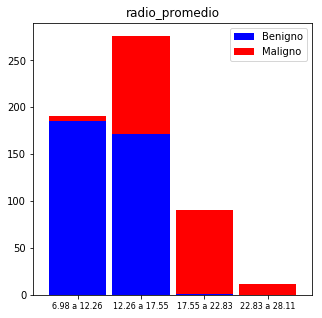

In [242]:
ax = histograma_benigno_maligno(intervalos(4),'radio_promedio')
plt.show()

Vemos que los radios mas pequeños representan mayores casosde cancer. Mientras que los radios mas grandes son casi todos casos malignos. Veamos si esta tendencia se mantiene al nivel de areas y perimetros: 

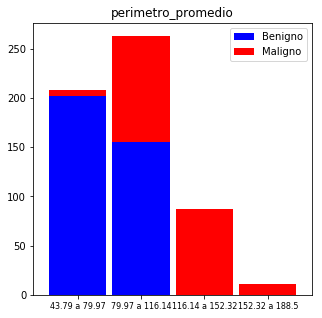

In [243]:
ax = histograma_benigno_maligno(intervalos(4),'perimetro_promedio' )

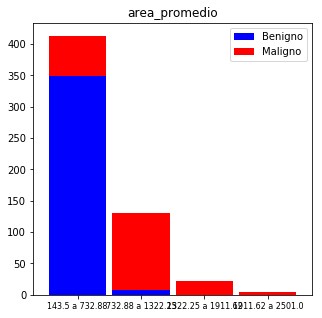

In [244]:
ax = histograma_benigno_maligno(intervalos(4),'area_promedio' )

Vemos que en caso del área se agudiza más la tendencia discutida en el caso del radio:

1) La mayoría de los casos de cancer aparecen en areas pequeñas.

2) Las areas pequeñas representan en su mayoría casos benignos, mientras que las areas grandes representan en su mayoría casos malignos

In [254]:
agrupado = data.groupby(intervalos(4))[['Benigno','Maligno']].sum()
agrupado.head()

,Benigno,Maligno


In [251]:
agrupado = data.groupby(intervalo(4))[['Benigno','Maligno']].sum()

fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='area_promedio', y='radio_promedio', 
               hue='Benigno', data=agrupado, 
               split=True,
               palette={0: "r", 1: "g"}
              );

NameError: name 'intervalo' is not defined

Obtenemos el sorpresivo resultado que no

**Visualización: Gráficas** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. 

Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

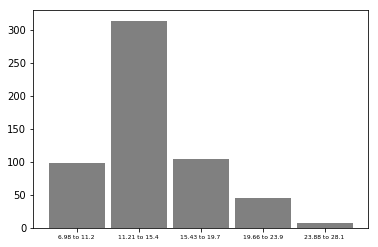

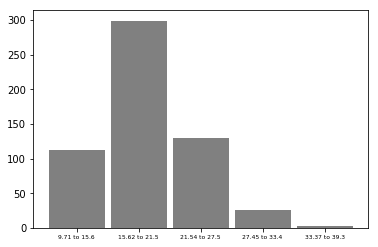

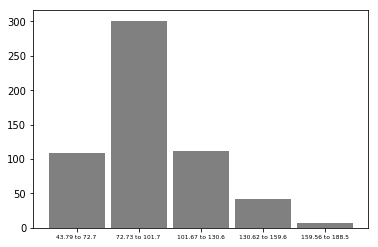

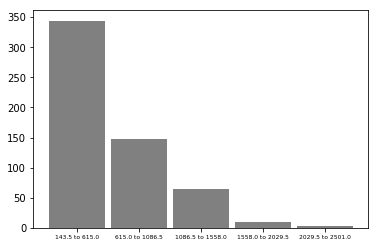

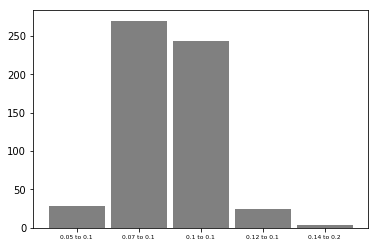

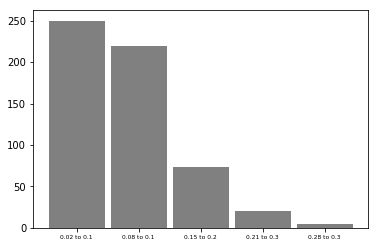

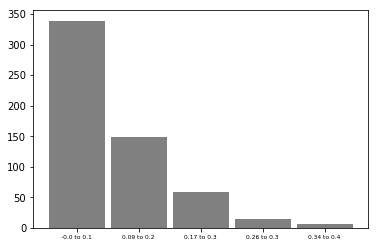

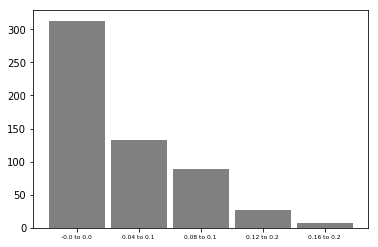

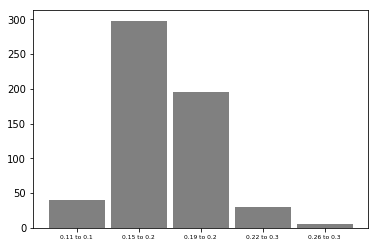

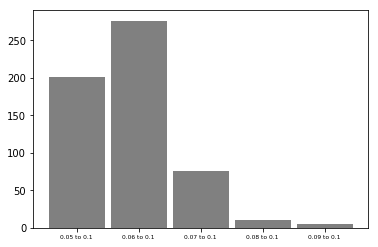

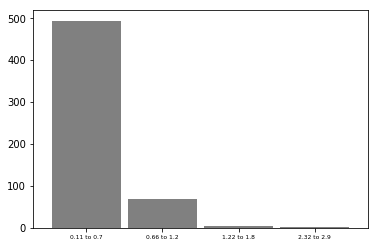

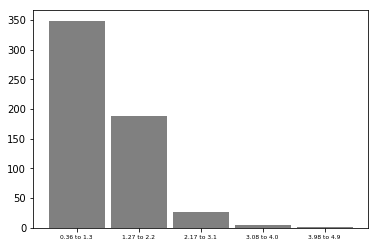

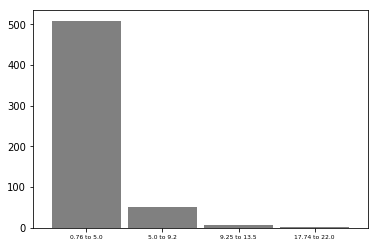

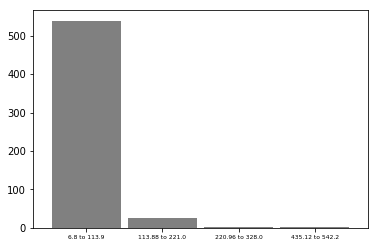

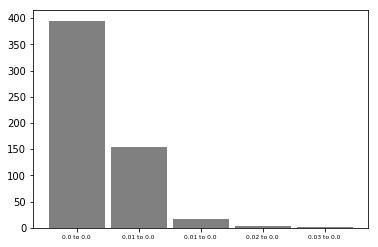

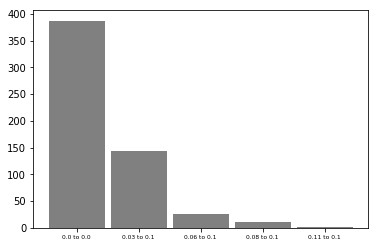

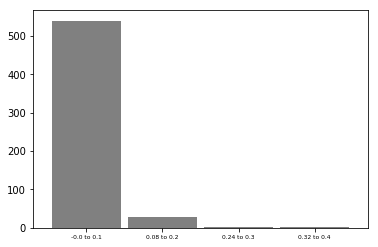

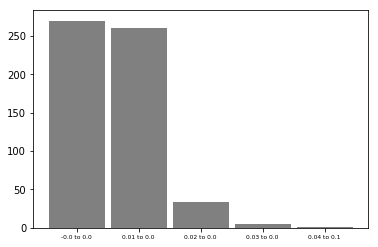

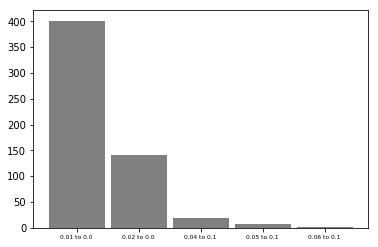

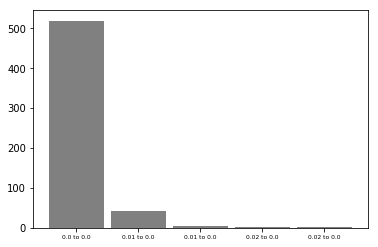

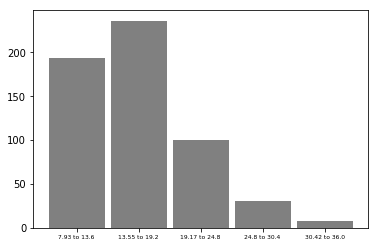

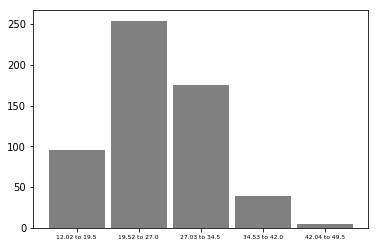

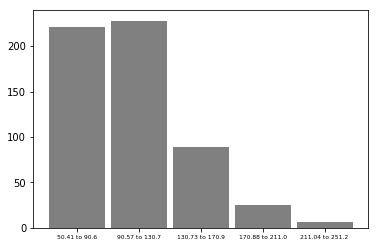

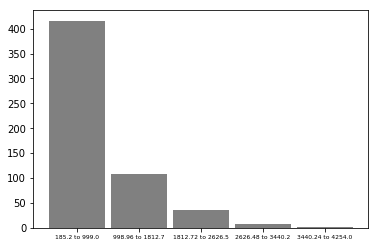

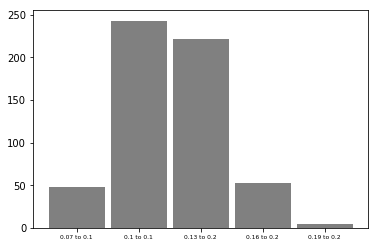

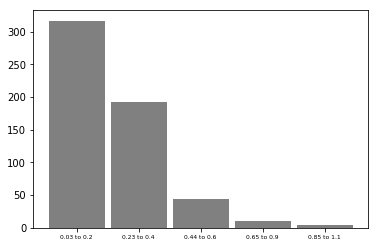

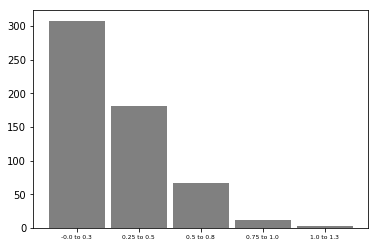

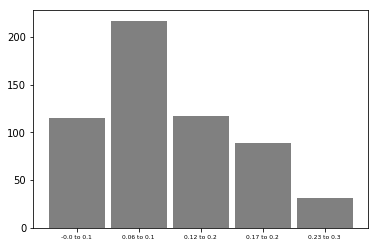

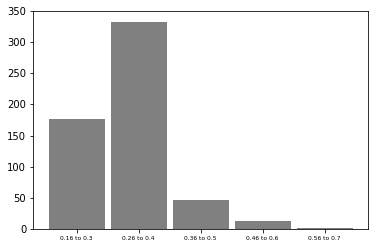

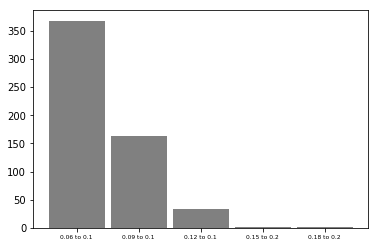

In [39]:
from matplotlib import pyplot as plt

for column in intervalos:
    frequency = intervalos[column].value_counts()
    frequency =  frequency[frequency != 0]
    ax = frequency.plot.bar(rot=0, color="gray", figsize=(6,4),stacked=True, width =0.9)
    xlabels = [str(np.around(c.left,decimals=2)) + ' to ' + str(np.around(c.right,decimals=1)) \
               for c in frequency.index.values]
    ax.set_xticklabels(xlabels,fontsize=6)
    plt.show()

**Radio Promedio** 

La visualización de los datos a través gráficas facilita la comprensión de la información que se quiere analizar. 

Los datos de nuestros atributos son valores númericos. Para darnos una idea de como se encuentran distribuídos los agrupamos en intervalos especificos. Después generamos gráficas para estás distribuiciones
***

In [41]:
data.groupby('Diagnostico').abgg('mean')

,ID,radio_promedio,textura_promedio,perimetro_promedio,area_promedio,suavidad_promedio,compactes_promedio,concavidad_promedio,puntos concavos_promedio,simetria_promedio,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactes_peor,concavidad_peor,puntos concavos_peor,simetria_peor,dimension fractal_peor
Diagnostico,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
data['Maligno'] =

In [149]:

data.groupby('Diagnostico').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

ValueError: too many values to unpack (expected 2)

data.groupby('Diagnostico')


## Analisis exploratorio de los datos

 - Extracción: Cargar el conjunto de datos y echarles una mirada
 - Limpieza: Encontrar los valores que faltan
 - Visualización: Crear algunas gráficas interesantes que nos permitan idendificar correlaciones y 
 - Suposiciones: Formular hipótesis sobre los gráficos

![](images/info-atributos-cropped.png)
